# (4주차) 10월5일
> 신경망의 표현력 

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈

### 강의영상 

> youtube: https://youtube.com/playlist?list=PLQqh36zP38-xlcnQrSBN2di4oQAQOXCgV

`-` (1/5) : 신경망 다어어그램 소개, polynomial regression (1)
    
`-` (2/5) : polynomial regression (2), peicewise linear model 

`-` (3/5) : 표현력의 증가, 신경망 다이어그램을 다시 소개 

`-` (4/5) : 노드수가 증가하면 국소최소점에 빠질 확률이 높음 (파라메터 학습어려움) 

`-` (5/5) : 노드수가 증가하면 오버피팅 이슈가 있음 

### Import 

In [1]:
import torch 
import numpy as np 
import matplotlib.pyplot as plt 

### graphviz setting 

In [2]:
import graphviz

- 설치가 되어있지 않다면 아래를 실행할것 (2개모두) 

```
!conda install -c conda-forge graphviz -y 
!pip install graphviz 
```

`-` 다이어그램을 그리기 위한 준비

In [3]:
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+s + '; }')

### 예제1: 선형모형

`-` $y_i= w_0+w_1 x_i +\epsilon_i \Longrightarrow \hat{y}_i = \hat{w}_0+\hat{w}_1 x_i$ 
- $\epsilon_i \sim N(0,1)$

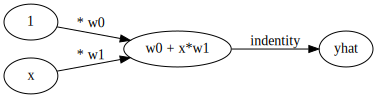

In [4]:
#collapse
gv(''' 
    "1" -> "w0 + x*w1"[label="* w0"]
    "x" -> "w0 + x*w1" [label="* w1"]
    "w0 + x*w1" -> "yhat"[label="indentity"]
    ''')

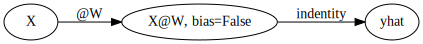

In [5]:
#collapse
gv('''
"X" -> "X@W, bias=False"[label="@W"] ;
"X@W, bias=False" -> "yhat"[label="indentity"] ''')

- X가 1 행렬을 포함하고 W가 bias를 포함하도록 표현한 경우

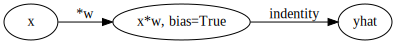

In [6]:
#collapse
gv('''
"x" -> "x*w, bias=True"[label="*w"] ;
"x*w, bias=True" -> "yhat"[label="indentity"] ''')

- bias(절편) = True를 통해 위 3개의 그림은 모두 같은 것을 뜻한다.

### 예제2: polynomial regression 

$y_i=w_0+w_1x_i + w_2 x_i^2 + w_3 x_i^3 +\epsilon_i$

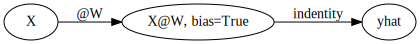

In [7]:
#collapse
gv('''
"X" -> "X@W, bias=True"[label="@W"]
"X@W, bias=True" -> "yhat"[label="indentity"] ''')

- ${\bf X} = \begin{bmatrix} 
x_1 & x_1^2 & x_1^3 \\ 
x_2 & x_2^2 & x_2^3 \\ 
\dots & \dots & \dots \\ 
x_n & x_n^2 & x_n^3 \\ 
\end{bmatrix}, \quad {\bf W} = \begin{bmatrix} 
w_1 \\ 
w_2 \\ 
w_3 
\end{bmatrix}$.

- X의 형태만 바뀐다.

#### 시뮬레이션 연습

`-` 모형

In [8]:
torch.manual_seed(43052)
x,_ = torch.randn(100).sort()
X=torch.vstack([x,x**2,x**3]).T
W=torch.tensor([[4.0],[3.0],[-2.0]])
bias=1.0 
ϵ=torch.randn(100,1)
y=X@W+bias + ϵ

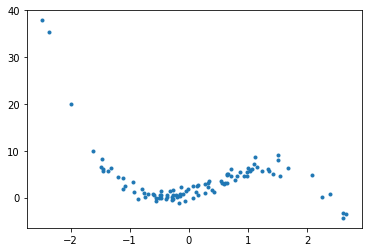

In [9]:
plt.plot(X[:,0],y,'.')
#plt.plot(X[:,0],X@W+bias,'--')

`-` 아키텍처 

In [10]:
net = torch.nn.Linear(in_features=3,out_features=1,bias=True) 

`-` 손실함수 

In [11]:
loss_fn=torch.nn.MSELoss() 

`-` 옵티마이저 

In [12]:
optimizer= torch.optim.SGD(net.parameters(),lr=0.01) 

`-` step1~4

In [13]:
for epoc in range(1000): 
    ## 1
    yhat=net(X)
    ## 2
    loss=loss_fn(y,yhat)
    ## 3
    loss.backward()
    ## 4
    optimizer.step() 
    net.zero_grad()

In [14]:
list(net.parameters())

[Parameter containing:
 tensor([[ 3.7411,  2.8648, -1.9074]], requires_grad=True),
 Parameter containing:
 tensor([1.0239], requires_grad=True)]

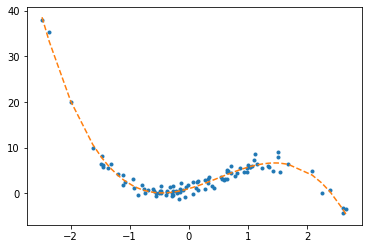

In [15]:
plt.plot(X[:,0],y,'.')
plt.plot(X[:,0],yhat.data,'--')

### 예제3: piece-wise linear regression 

`-` 모델 

In [ ]:
_x = np.linspace(-1,1,100).tolist()
_f = lambda x: x*1+np.random.normal()*0.3 if x<0 else x*3.5 +np.random.normal()*0.3 
_y = list(map(_f,_x))

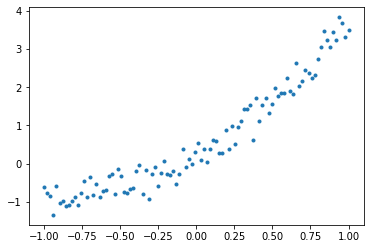

In [ ]:
plt.plot(_x,_y,'.')

In [ ]:
X=torch.tensor(_x).reshape(100,1)
y=torch.tensor(_y).reshape(100,1)

#### 풀이1

`-` 아키텍처 + 손실함수(MSE) + 옵티마이저(SGD) 

In [ ]:
net=torch.nn.Linear(in_features=1,out_features=1,bias=True) 
loss_fn = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(net.parameters(),lr=0.1) 

`-` step1~4

In [ ]:
for epoc in range(10000): 
    ## 1
    yhat=net(X)
    ## 2
    loss=loss_fn(y,yhat)
    ## 3
    loss.backward()
    ## 4
    optimizer.step() 
    net.zero_grad()

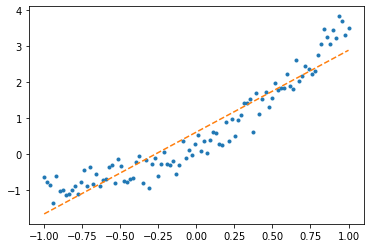

In [ ]:
plt.plot(X,y,'.')
plt.plot(X,yhat.data,'--')

`-` 실패: 그리고 epoc을 10억번 반복해도 이건 실패할 모형임 
- 왜? 모델자체가 틀렸음. 
- 모델의 표현력이 너무 부족하다. $\to$ underfitting 

#### 풀이2 (비선형 활성화함수를 도입)

`-` 비선형활성화함수를 도입하자. (네트워크수정)

In [ ]:
torch.manual_seed(1)
layer1 = torch.nn.Linear(in_features=1,out_features=1,bias=False) 
activation1 = torch.nn.ReLU() 
layer2 = torch.nn.Linear(in_features=1,out_features=1,bias=False) 
net2 = torch.nn.Sequential(layer1,activation1,layer2) 

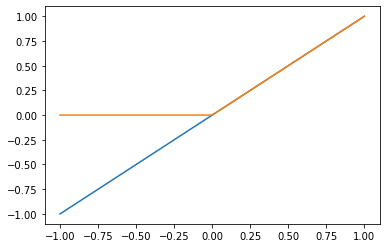

In [ ]:
_x=np.linspace(-1,1,100)
plt.plot(_x,_x)
plt.plot(_x,activation1(torch.tensor(_x)))

`-` 표현력 확인 

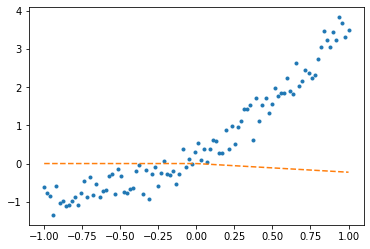

In [ ]:
plt.plot(X,y,'.')
plt.plot(X,net2(X).data,'--')

`-` 옵티마이저2

In [ ]:
optimizer2 = torch.optim.SGD(net2.parameters(),lr=0.1)

`-` step1~4

In [ ]:
for epoc in range(1000): 
    ## 1
    yhat=net2(X)
    ## 2
    loss=loss_fn(y,yhat)
    ## 3
    loss.backward()
    ## 4
    optimizer2.step() 
    net2.zero_grad()

`-` result

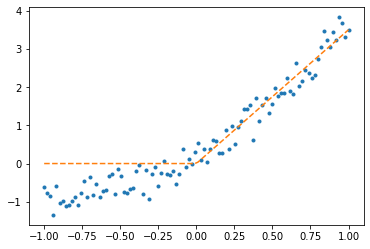

In [ ]:
plt.plot(X,y,'.')
plt.plot(X,yhat.data,'--')

`-` discussion 
- 이것 역시 수백억번 epoc을 반복해도 이 이상 적합하기 힘들다. $\to$ 모형의 표현력이 낮다. 
- 해결책: 주황색점선이 2개 있다면 어떨까? 

#### 풀이3 (노드수 추가)

`-` 아키텍처 + 옵티마이저

In [ ]:
torch.manual_seed(1) ## 초기가중치를 동일하게 
layer1 = torch.nn.Linear(in_features=1,out_features=2,bias=False) # out_features 를 2로 설정 
activation1 = torch.nn.ReLU() 
layer2 = torch.nn.Linear(in_features=2,out_features=1,bias=False) 
net3 = torch.nn.Sequential(layer1,activation1,layer2) 
optimizer3= torch.optim.SGD(net3.parameters(),lr=0.1)

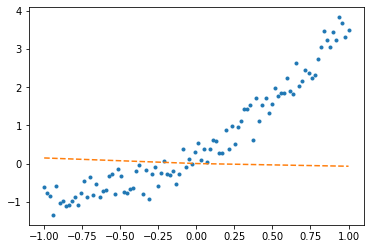

In [ ]:
plt.plot(X,y,'.')
plt.plot(X,net3(X).data,'--')

`-` Step 1~4 

In [ ]:
for epoc in range(1000): 
    ## 1
    yhat=net3(X)
    ## 2
    loss=loss_fn(y,yhat)
    ## 3
    loss.backward()
    ## 4
    optimizer3.step() 
    net3.zero_grad()

`-` result

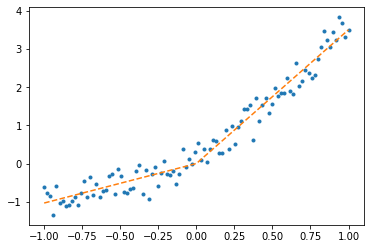

In [ ]:
plt.plot(X,y,'.')
plt.plot(X,yhat.data,'--')

`-` discussion 

In [ ]:
list(net3.parameters())

[Parameter containing:
 tensor([[ 1.8989],
         [-1.0365]], requires_grad=True), Parameter containing:
 tensor([[ 1.8467, -0.9985]], requires_grad=True)]

- 파라메터확인 

In [ ]:
W1=(layer1.weight.data).T
W2=(layer2.weight.data).T
W1,W2

(tensor([[ 1.8989, -1.0365]]), tensor([[ 1.8467],
         [-0.9985]]))

- 파라메터 저장 

`-` 어떻게 적합이 이렇게 우수하게 되었는지 따져보자. 

In [ ]:
W1

tensor([[ 1.8989, -1.0365]])

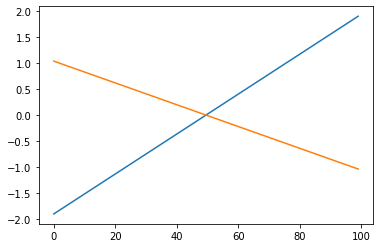

In [ ]:
u1=X@W1
plt.plot(u1)
#plt.plot(X@W1)

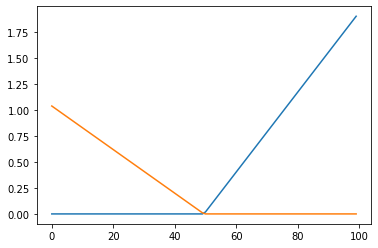

In [ ]:
v1=activation1(u1)
plt.plot(v1)
#plt.plot(activation1(X@W1))

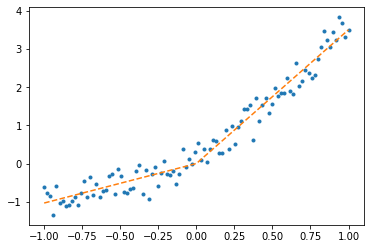

In [ ]:
_yhat=v1@W2 
plt.plot(X,y,'.')
plt.plot(X,_yhat,'--')
#plt.plot(X,activation1(X@W1)@W2,'--')

#### 잠깐요약 (신경망)

`-` 계산과정 

(1) $X \to X@W^{(1)} \to ReLU(X@W^{(1)}) \to ReLU(X@W^{(1)})@W^{(2)}=yhat$

- $X: n \times 1$
- $W^{(0)}: 1 \times 2$
- $W^{(1)}: 2 \times 1$

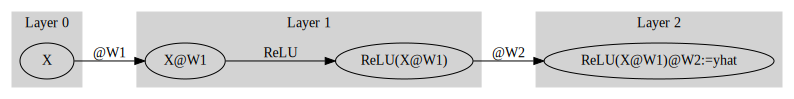

In [ ]:
#collapse
gv('''
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "X" 
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "X" -> "X@W1"[label="@W1"]
    "X@W1" -> "ReLU(X@W1)"[label="ReLU"]
    label = "Layer 1"
}
subgraph cluster_3{
    style=filled;
    color=lightgrey;
    "ReLU(X@W1)" -> "ReLU(X@W1)@W2:=yhat"[label="@W2"]
    label = "Layer 2"
}
''')

(2) 아래와 같이 표현할 수도 있다. 

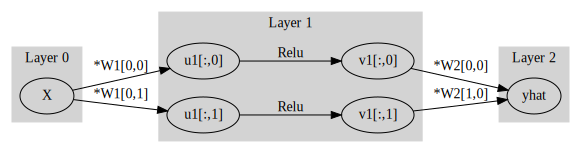

In [ ]:
#collapse
gv('''
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "X" 
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "X" -> "u1[:,0]"[label="*W1[0,0]"]
    "X" -> "u1[:,1]"[label="*W1[0,1]"]
    "u1[:,0]" -> "v1[:,0]"[label="Relu"]
    "u1[:,1]" -> "v1[:,1]"[label="Relu"]
    label = "Layer 1"
}
subgraph cluster_3{
    style=filled;
    color=lightgrey;
    "v1[:,0]" -> "yhat"[label="*W2[0,0]"]
    "v1[:,1]" -> "yhat"[label="*W2[1,0]"]
    label = "Layer 2"
}
''')

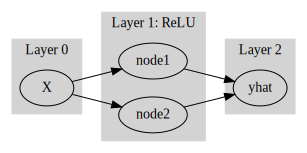

In [ ]:
#collapse
gv('''
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "X" 
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "X" -> "node1"
    "X" -> "node2"
    label = "Layer 1: ReLU"
}
subgraph cluster_3{
    style=filled;
    color=lightgrey;
    "node1" -> "yhat"
    "node2" -> "yhat"
    label = "Layer 2"
}
''')

- Layer가 많으면 깊은 신경망, node가 많으면 넓은 신경망이라고 한다.

`-` 위와 같은 다이어그램을 적용하면 예제1은 아래와 같이 표현가능 

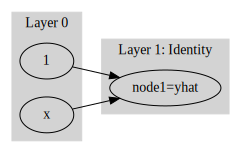

In [ ]:
#collapse
gv('''
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "1" 
    "x" 
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "1" -> "node1=yhat"
    "x" -> "node1=yhat"
    label = "Layer 1: Identity"
}
''')

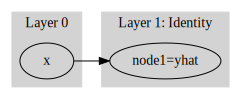

In [ ]:
#collapse
gv('''
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "x" 
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "x" -> "node1=yhat"
    label = "Layer 1: Identity"
}
''')

`-` 예제2의 아키텍처 

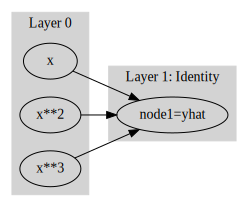

In [ ]:
#collapse
gv('''
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "x" 
    "x**2" 
    "x**3" 
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "x" -> "node1=yhat"
    "x**2" -> "node1=yhat"
    "x**3" -> "node1=yhat"
    label = "Layer 1: Identity"
}
''')

#### 풀이3이 실패할 수도 있음 

`-` 아키텍처 + 옵티마이저

In [ ]:
torch.manual_seed(40352) ## 초기가중치를 동일하게 
layer1 = torch.nn.Linear(in_features=1,out_features=2,bias=False) 
activation1 = torch.nn.ReLU() 
layer2 = torch.nn.Linear(in_features=2,out_features=1,bias=False) 
net3 = torch.nn.Sequential(layer1,activation1,layer2) 
optimizer3= torch.optim.SGD(net3.parameters(),lr=0.1)

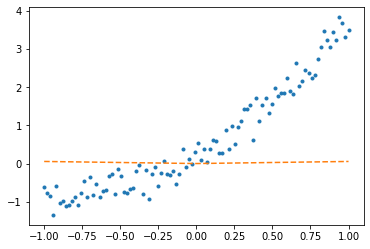

In [ ]:
plt.plot(X,y,'.')
plt.plot(X,net3(X).data,'--')

`-` Step 1~4 

In [ ]:
for epoc in range(10000): 
    ## 1
    yhat=net3(X)
    ## 2
    loss=loss_fn(y,yhat)
    ## 3
    loss.backward()
    ## 4
    optimizer3.step() 
    net3.zero_grad()

`-` result

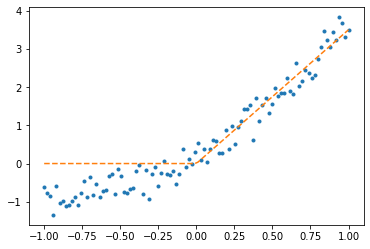

In [ ]:
plt.plot(X,y,'.')
plt.plot(X,yhat.data,'--')

- epoch 를 늘려도 모형이 그대로인 것을 확인할 수 있다.

`-` 왜 가중치가 변하지 않는가? (이것보다 더 좋은 fitting이 있음을 우리는 이미 알고있는데..)

In [ ]:
W1=(layer1.weight.data).T
W2=(layer2.weight.data).T
W1,W2

(tensor([[1.2382e-03, 1.8342e+00]]), tensor([[0.0720],
         [1.9118]]))

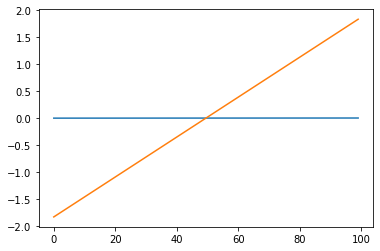

In [ ]:
u1=X@W1
plt.plot(u1)
#plt.plot(X@W1)

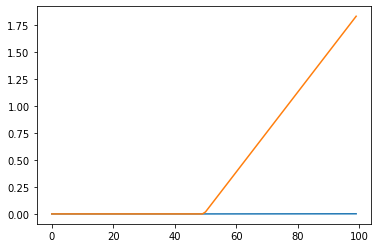

In [ ]:
v1=activation1(u1)
plt.plot(v1)
#plt.plot(activation1(X@W1))

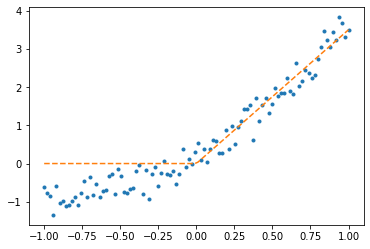

In [ ]:
_yhat=v1@W2 
plt.plot(X,y,'.')
plt.plot(X,_yhat,'--')
#plt.plot(X,activation1(X@W1)@W2,'--')

`-` 고약한 상황에 빠졌음. 

#### 풀이4: 넓은 신경망 

`-` Custom Activation Function 

In [ ]:
# simply define a mooyaho function
   
def mooyaho(input):
    return torch.sigmoid(200*input) # 이 부분에서 기존 sigmoid 보다 더 급한 경사를 갖게 된다.
    
class MOOYAHO(torch.nn.Module):
    def __init__(self):
        super().__init__() # init the base class

    def forward(self, input):
        return mooyaho(input) # simply apply already implemented SiLU

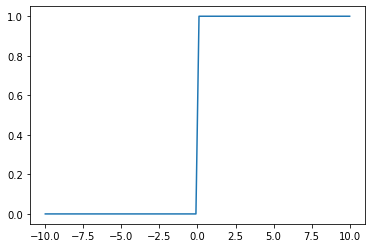

In [ ]:
_x=torch.linspace(-10,10,100)
plt.plot(_x,mooyaho(_x))

- sigmoid 보다 더 급한 경사를 갖는 함수

`-` 아키텍처

In [ ]:
torch.manual_seed(1) # 초기가중치를 똑같이 하기 위해서.. 
layer1=torch.nn.Linear(in_features=1,out_features=500,bias=True)
activation1=MOOYAHO() 
layer2=torch.nn.Linear(in_features=500,out_features=1,bias=True)
net4=torch.nn.Sequential(layer1,activation1,layer2)
optimizer4=torch.optim.SGD(net4.parameters(),lr=0.001) 

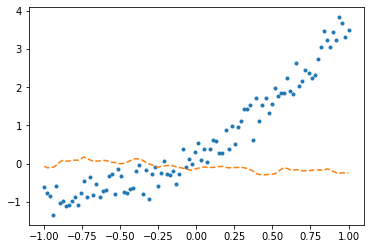

In [ ]:
plt.plot(X,y,'.')
plt.plot(X,net4(X).data,'--')

`-` step1~4

In [ ]:
for epoc in range(5000):
    # 1 
    yhat=net4(X)
    # 2
    loss=loss_fn(yhat,y) 
    # 3 
    loss.backward()
    # 4 
    optimizer4.step()
    net4.zero_grad() 

`-` result

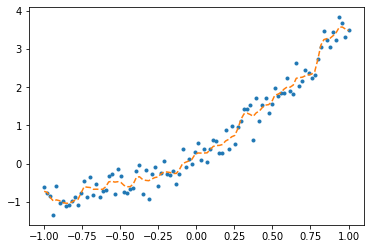

In [ ]:
plt.plot(X,y,'.')
plt.plot(X,yhat.data,'--')

`-` 넓은 신경망은 과적합을 하는 경우가 종종있다. 

`-` 무엇이든 맞출 수 있음 

In [ ]:
torch.manual_seed(43052)
__X = torch.linspace(-1,1,100).reshape(100,1)
__y = torch.randn(100,1)

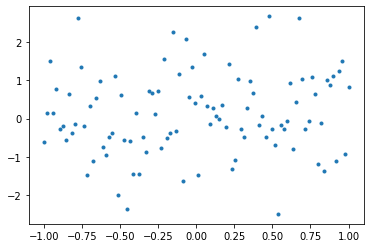

In [ ]:
plt.plot(__X,__y,'.')

In [ ]:
torch.manual_seed(1) # 초기가중치를 똑같이 하기 위해서.. 
layer1=torch.nn.Linear(in_features=1,out_features=500,bias=True)
activation1=MOOYAHO() 
layer2=torch.nn.Linear(in_features=500,out_features=1,bias=True)
net4=torch.nn.Sequential(layer1,activation1,layer2)
optimizer4=torch.optim.SGD(net4.parameters(),lr=0.001) 

`-` step1~4

In [ ]:
for epoc in range(5000):
    # 1 
    __yhat=net4(__X)
    # 2
    loss=loss_fn(__yhat,__y) 
    # 3 
    loss.backward()
    # 4 
    optimizer4.step()
    net4.zero_grad() 

`-` result

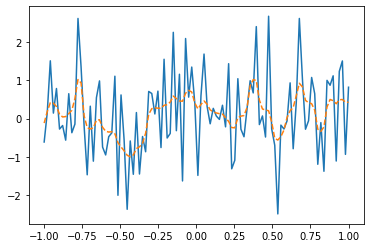

In [ ]:
plt.plot(__X,__y,)
plt.plot(__X,__yhat.data,'--')

In [ ]:
loss_fn(__y,__y*0), loss_fn(__y,__yhat.data)

(tensor(1.1437), tensor(0.7460))

### 숙제

`-` 예제2: polynomial regression 에서 

```python
optimizer= torch.optim.SGD(net.parameters(),lr=0.01) 
```

대신에 

```python
optimizer= torch.optim.SGD(net.parameters(),lr=0.1) 
```

로 변경하여 학습하고 결과를 관찰할것. 

설명: 위와 같은 결과가 나온 이유는... 